In [173]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime
import yfinance as yf

In [174]:
pd.set_option('display.max_rows', 100)

In [4]:
# acs_df=pd.read_csv('../data/acs_5yr_merged.csv')

In [5]:
# print(acs_df.columns.tolist())

In [248]:
county_to_zip_df = pd.read_excel('../../data/COUNTY_ZIP_062021.xlsx',
                                 index_col=None,
                                 dtype= {'county': str, 'zip': str})  

In [246]:
zri_df=pd.read_csv('../data/zri_acs_bikeshare_merged.csv')
zri_df['zip'] = zri_df['zip'].astype(str)
zri_df['zip'] = zri_df['zip'].map(lambda x: '0' + x if len(x) < 5 else x)
zipcodes = zri_df['zip'].unique()

### Need to figure this part out for GDP

In [249]:
GDP_df_og=pd.read_csv('../../data/CAGDP1/CAGDP1__ALL_AREAS_2001_2019.csv', low_memory=False)

In [250]:
GDP_df_og.head()
# print(GDP_CA_df_og.columns.tolist())

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States,,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,13262079000,13493064000,...,15598753000,15840664000,16197007000,16495369000,16912038000,17432170000,17730509000,18144105000,18687786000,19091662000
1,"""00000""",United States,,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,81.880,83.306,...,96.306,97.800,100.000,101.842,104.415,107.626,109.468,112.021,115.378,117.872
2,"""00000""",United States,,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,10581822000,10936418000,...,14992052000,15542582000,16197007000,16784851000,17527258000,18238301000,18745075000,19542980000,20611861000,21433226000
3,"""01000""",Alabama,5,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,157137932,161258050,...,183014476,185666914,186553871,188814180,187568050,189428816,191523406,193692995,198053707,200829359
4,"""01000""",Alabama,5,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,84.232,86.440,...,98.103,99.525,100.000,101.212,100.544,101.541,102.664,103.827,106.164,107.652


In [251]:
GDP_df = GDP_df_og.drop(['Region', 'TableName', 
                         'LineCode', 'IndustryClassification'], axis=1)

In [252]:
GDP_df['GeoName'].unique().shape

(3177,)

In [253]:
GDP_df.tail(30)

,GeoFIPS,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9502,"""56045""","Weston, WY",Chain-type quantity indexes for real GDP,Quantity index,85.010,82.468,85.733,87.185,95.517,109.820,...,95.044,88.312,100.000,87.360,89.155,100.352,89.934,89.796,96.643,101.476
9503,"""56045""","Weston, WY",Current-dollar GDP (thousands of current dollars),Thousands of dollars,166536,157881,179025,195424,243645,299043,...,259986,275095,321172,276345,281864,299245,254092,273154,318654,319777
9504,"""91000""",New England,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,760286960,766605111,784872262,815626953,830888598,850567738,...,872608710,877422187,889595848,885435329,894930101,924397529,935470353,951181745,972989631,990777463
9505,"""91000""",New England,Chain-type quantity indexes for real GDP,Quantity index,85.464,86.175,88.228,91.685,93.401,95.613,...,98.090,98.632,100.000,99.532,100.600,103.912,105.157,106.923,109.374,111.374
9506,"""91000""",New England,Current-dollar GDP (thousands of current dollars),Thousands of dollars,611131701,627331412,651782704,693746768,725596282,763886071,...,840719793,858450596,889595848,904710516,933950356,986167415,1013113822,1045211157,1092293242,1135663656
9507,"""92000""",Mideast,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2537443511,2554477141,2591746466,2663685565,2734138866,2785291421,...,2904115053,2920656047,2992665018,3009890069,3057470978,3122663648,3171702768,3209379755,3280345429,3336480569
9508,"""92000""",Mideast,Chain-type quantity indexes for real GDP,Quantity index,84.789,85.358,86.603,89.007,91.361,93.071,...,97.041,97.594,100.000,100.576,102.165,104.344,105.983,107.242,109.613,111.489
9509,"""92000""",Mideast,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1989795034,2043084173,2112672454,2234303411,2360987821,2481579329,...,2786889442,2853339596,2992665018,3079378698,3202883906,3333694340,3440758051,3547218219,3720943355,3863001007
9510,"""93000""",Great Lakes,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2063917705,2103209816,2145213630,2195667387,2231489494,2249857113,...,2175859209,2222060378,2252862654,2275544123,2334059871,2370031454,2390340363,2419655780,2479517963,2505871830
9511,"""93000""",Great Lakes,Chain-type quantity indexes for real GDP,Quantity index,91.613,93.357,95.222,97.461,99.051,99.867,...,96.582,98.633,100.000,101.007,103.604,105.201,106.102,107.404,110.061,111.231


In [254]:
GDP_df.drop(GDP_df.index[9504:9532], inplace=True)


In [255]:
GDP_df.drop(GDP_df.index[0:3], inplace=True)

In [256]:
GDP_df

,GeoFIPS,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,"""01000""",Alabama,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,157137932,161258050,165250533,175916841,181871047,185337029,...,183014476,185666914,186553871,188814180,187568050,189428816,191523406,193692995,198053707,200829359
4,"""01000""",Alabama,Chain-type quantity indexes for real GDP,Quantity index,84.232,86.440,88.581,94.298,97.490,99.348,...,98.103,99.525,100.000,101.212,100.544,101.541,102.664,103.827,106.164,107.652
5,"""01000""",Alabama,Current-dollar GDP (thousands of current dollars),Thousands of dollars,123035307,128117443,133969348,146886707,156403303,164347837,...,175470140,181929880,186553871,192166511,195037686,200197466,204454687,210895743,221030697,228142616
6,"""01001""","Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,943367,973575,987540,1136277,1140062,1224883,...,1222286,1323275,1487130,1416052,1412808,1529517,1581893,1494278,1537059,1501769
7,"""01001""","Autauga, AL",Chain-type quantity indexes for real GDP,Quantity index,63.435,65.467,66.406,76.407,76.662,82.366,...,82.191,88.982,100.000,95.220,95.002,102.850,106.372,100.481,103.357,100.984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,"""56043""","Washakie, WY",Chain-type quantity indexes for real GDP,Quantity index,93.824,91.891,95.501,94.150,89.816,101.618,...,102.214,107.635,100.000,101.457,103.830,106.763,96.694,92.046,95.097,99.574
9500,"""56043""","Washakie, WY",Current-dollar GDP (thousands of current dollars),Thousands of dollars,251552,250180,270514,278625,277704,324182,...,356519,392370,370923,386281,399818,400260,363856,353309,373261,398925
9501,"""56045""","Weston, WY",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,273028,264863,275349,280013,306772,352711,...,305253,283634,321172,280574,286341,322302,288843,288400,310389,325913
9502,"""56045""","Weston, WY",Chain-type quantity indexes for real GDP,Quantity index,85.010,82.468,85.733,87.185,95.517,109.820,...,95.044,88.312,100.000,87.360,89.155,100.352,89.934,89.796,96.643,101.476


In [257]:
type(GDP_df['GeoFIPS'][23])

str

In [222]:
GDP_df.Description.unique()

array(['Real GDP (thousands of chained 2012 dollars)',
       'Chain-type quantity indexes for real GDP',
       'Current-dollar GDP (thousands of current dollars)'], dtype=object)

In [258]:
GDP_df['GeoFIPS'] = GDP_df['GeoFIPS'].str.replace('"', '')
GDP_df['GeoFIPS'] = GDP_df['GeoFIPS'].str.replace(' ', '')

In [259]:
GDP_df[GDP_df.GeoName == 'Queens, NY']

,GeoFIPS,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5712,36081,"Queens, NY",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,65164408,65720595,66695424,67841120,69063857,72562951,...,78463891,79485534,80978973,81962369,84466650,86808064,87874398,89548957,96285391,95547729
5713,36081,"Queens, NY",Chain-type quantity indexes for real GDP,Quantity index,80.471,81.158,82.361,83.776,85.286,89.607,...,96.894,98.156,100.000,101.214,104.307,107.198,108.515,110.583,118.902,117.991
5714,36081,"Queens, NY",Current-dollar GDP (thousands of current dollars),Thousands of dollars,50869878,52660772,54516382,56779831,59375648,64500951,...,75366416,77368522,80978973,84076130,89191574,94623239,98035923,101738081,112038902,114644556


In [266]:
county_to_zip_df = county_to_zip_df.loc[county_to_zip_df['zip'].isin(zipcodes)]

In [276]:
full_GDP_df = county_to_zip_df.merge(GDP_df, 
                       how= 'right', left_on = 'county', 
                       right_on = 'GeoFIPS')\
.drop(['res_ratio', 'bus_ratio', 
       'oth_ratio', 'tot_ratio', 
       'GeoFIPS'], axis=1)\
.dropna(subset=['zip'])

In [295]:
missing_zips = set(county_to_zip_df['zip']) - set(full_GDP_df['zip'])
missing_zips

set

In [302]:
county_to_zip_df[county_to_zip_df['zip'].isin(missing_zips)]

,county,zip,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
48821,51003,22901,CHARLOTTESVILLE,VA,0.274194,0.406724,0.457193,0.288713
48836,51003,22903,CHARLOTTESVILLE,VA,0.139321,0.144668,0.253803,0.143873
49210,51059,22033,FAIRFAX,VA,0.035450,0.023636,0.055573,0.035374
49222,51059,22030,FAIRFAX,VA,0.030226,0.019445,0.039040,0.029743
49237,51059,22031,FAIRFAX,VA,0.028292,0.038844,0.029269,0.029181
49240,51059,22180,VIENNA,VA,0.022182,0.026814,0.021025,0.022503
49270,51059,22102,MC LEAN,VA,0.033781,0.056429,0.035420,0.035670
49272,51059,22303,ALEXANDRIA,VA,0.018973,0.007675,0.011603,0.017747
49854,51153,22192,WOODBRIDGE,VA,0.120042,0.167635,0.171894,0.124181
49855,51153,22191,WOODBRIDGE,VA,0.144039,0.121522,0.218539,0.144629


In [283]:
GDP_df[GDP_df['GeoFIPS']== '51153']

,GeoFIPS,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019


In [285]:
VA_GDP_df_og=pd.read_csv('../../data/CAGDP1/CAGDP1_VA_2001_2019.csv', low_memory=False)

In [292]:

# VA_GDP_df_og.drop(VA_GDP_df_og.index[318:], inplace=True)
# VA_GDP_df_og.drop(VA_GDP_df_og.index[:249], inplace=True)
VA_GDP_df = VA_GDP_df_og

In [300]:
VA_GDP_df

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
249,"""51901""","Albemarle + Charlottesville, VA*",5.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,6.942461e+06,7.064438e+06,...,9.343144e+06,9.278887e+06,9493391.0,9.398888e+06,9.624083e+06,9.671618e+06,9.972689e+06,1.043634e+07,1.066440e+07,1.071260e+07
250,"""51901""","Albemarle + Charlottesville, VA*",5.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,7.312900e+01,7.441400e+01,...,9.841700e+01,9.774000e+01,100.0,9.900500e+01,1.013770e+02,1.018770e+02,1.050490e+02,1.099330e+02,1.123350e+02,1.128430e+02
251,"""51901""","Albemarle + Charlottesville, VA*",5.0,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,5.468836e+06,5.688901e+06,...,9.005600e+06,9.056490e+06,9493391.0,9.623608e+06,1.007230e+07,1.037212e+07,1.085973e+07,1.152979e+07,1.203691e+07,1.236387e+07
252,"""51903""","Alleghany + Covington, VA*",5.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,7.557130e+05,8.319050e+05,...,8.223880e+05,8.345930e+05,936367.0,8.674640e+05,7.823330e+05,8.104060e+05,8.201770e+05,7.773430e+05,8.117400e+05,8.341660e+05
253,"""51903""","Alleghany + Covington, VA*",5.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,8.070700e+01,8.884400e+01,...,8.782800e+01,8.913100e+01,100.0,9.264100e+01,8.355000e+01,8.654800e+01,8.759100e+01,8.301700e+01,8.669000e+01,8.908500e+01
254,"""51903""","Alleghany + Covington, VA*",5.0,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,6.171560e+05,6.857000e+05,...,8.044890e+05,8.231510e+05,936367.0,8.972420e+05,8.266140e+05,8.795170e+05,9.010450e+05,8.727290e+05,9.311280e+05,9.757070e+05
255,"""51907""","Augusta, Staunton + Waynesboro, VA*",5.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,4.493720e+06,4.259783e+06,...,5.032581e+06,4.883524e+06,4675460.0,4.709668e+06,4.719265e+06,4.707396e+06,4.668642e+06,4.699754e+06,4.766582e+06,4.848087e+06
256,"""51907""","Augusta, Staunton + Waynesboro, VA*",5.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,9.611300e+01,9.110900e+01,...,1.076380e+02,1.044500e+02,100.0,1.007320e+02,1.009370e+02,1.006830e+02,9.985400e+01,1.005200e+02,1.019490e+02,1.036920e+02
257,"""51907""","Augusta, Staunton + Waynesboro, VA*",5.0,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,3.506814e+06,3.407210e+06,...,4.818229e+06,4.729180e+06,4675460.0,4.812040e+06,4.925490e+06,5.040711e+06,5.092958e+06,5.173175e+06,5.327859e+06,5.543563e+06
258,"""51911""","Campbell + Lynchburg, VA*",5.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,5.857729e+06,5.955754e+06,...,7.043938e+06,6.944245e+06,6631307.0,6.605318e+06,6.573714e+06,6.502550e+06,6.505017e+06,6.606538e+06,6.741000e+06,6.796229e+06


In [262]:
len(full_GDP_df['zip'].unique())

39448

In [263]:
full_GDP_df = full_GDP_df.loc[full_GDP_df['zip'].isin(zipcodes)]

In [264]:
full_GDP_df

,county,zip,usps_zip_pref_city,usps_zip_pref_state,GeoName,Description,Unit,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3411,02020,99504,ANCHORAGE,AK,"Anchorage Municipality, AK",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,16434951,16561222,16861660,...,20545117,20830962,20739537,20184001,20224593,21148188,21029302,20689056,20784285,20827222
3412,02020,99504,ANCHORAGE,AK,"Anchorage Municipality, AK",Chain-type quantity indexes for real GDP,Quantity index,79.245,79.853,81.302,...,99.063,100.441,100.000,97.321,97.517,101.970,101.397,99.757,100.216,100.423
3413,02020,99504,ANCHORAGE,AK,"Anchorage Municipality, AK",Current-dollar GDP (thousands of current dollars),Thousands of dollars,12366029,12722689,13373498,...,19737506,20440588,20739537,20705137,21163433,22045385,22182364,22293757,22988337,23604109
3429,02020,99501,ANCHORAGE,AK,"Anchorage Municipality, AK",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,16434951,16561222,16861660,...,20545117,20830962,20739537,20184001,20224593,21148188,21029302,20689056,20784285,20827222
3430,02020,99501,ANCHORAGE,AK,"Anchorage Municipality, AK",Chain-type quantity indexes for real GDP,Quantity index,79.245,79.853,81.302,...,99.063,100.441,100.000,97.321,97.517,101.970,101.397,99.757,100.216,100.423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158768,55101,53403,RACINE,WI,"Racine, WI",Chain-type quantity indexes for real GDP,Quantity index,98.270,98.487,100.498,...,101.221,100.394,100.000,96.841,97.617,96.046,94.929,93.438,96.068,96.772
158769,55101,53403,RACINE,WI,"Racine, WI",Current-dollar GDP (thousands of current dollars),Thousands of dollars,6266581,6372444,6567847,...,7745763,7826654,8059614,7992196,8238463,8381795,8447296,8428913,8839685,9128301
159805,55139,54901,OSHKOSH,WI,"Winnebago, WI",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,7795485,8534295,8593061,...,8745031,8860711,8972614,8876242,8981501,8994794,9266304,9257547,9484146,9725443
159806,55139,54901,OSHKOSH,WI,"Winnebago, WI",Chain-type quantity indexes for real GDP,Quantity index,86.881,95.115,95.770,...,97.464,98.753,100.000,98.926,100.099,100.247,103.273,103.176,105.701,108.390


In [230]:
melted_full_GDP_df = pd.melt(full_GDP_df,
                                id_vars=['county', 'zip', 
                                         'usps_zip_pref_city', 
                                         'usps_zip_pref_state', 
                                         'GeoName', 'Description', 
                                         'Unit'],\
        value_vars=['2013', '2014', '2015', 
                    '2016', '2017', '2018', 
                    '2019'])

In [231]:
melted_full_GDP_df = melted_full_GDP_df.rename(columns={'variable': 'year'})

In [232]:
type(melted_full_GDP_df['value'][0])

str

In [235]:
GDP_grouped_by_descr_melted = melted_full_GDP_df.groupby('Description')
GDP_grouped_by_area_melted = melted_full_GDP_df.groupby('GeoName')
GDP_grouped_by_zip_melted = melted_full_GDP_df.groupby('zip')

In [386]:
# income_grouped_by_descr_melted.get_group('Personal income (thousands of dollars)')

,county,zip,usps_zip_pref_city,usps_zip_pref_state,GeoName,Description,Unit,variable,value
0,01001,36749,JONES,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
1,01001,36068,PRATTVILLE,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
2,01001,36067,PRATTVILLE,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
3,01001,36008,BOOTH,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
4,01001,36022,DEATSVILLE,AL,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,2010,1826597
...,...,...,...,...,...,...,...,...,...
12269673,56045,82721,MOORCROFT,WY,"Weston, WY",Personal income (thousands of dollars),Thousands of dollars,2019,323176
12269674,56045,82701,NEWCASTLE,WY,"Weston, WY",Personal income (thousands of dollars),Thousands of dollars,2019,323176
12269675,56045,82729,SUNDANCE,WY,"Weston, WY",Personal income (thousands of dollars),Thousands of dollars,2019,323176
12269676,56045,82723,OSAGE,WY,"Weston, WY",Personal income (thousands of dollars),Thousands of dollars,2019,323176


In [141]:
# grouped_by_zip_melted.get_group('10025')

KeyError: '10025'

In [408]:
# nyc = melted_full_income_df[(melted_full_income_df['GeoName'] == "New York, NY")]


#['zip'].unique()

In [405]:

# melted_full_income_df['value'] = pd.to_numeric(melted_full_income_df['value'])
# type(melted_full_income_df.value[1])


numpy.int64

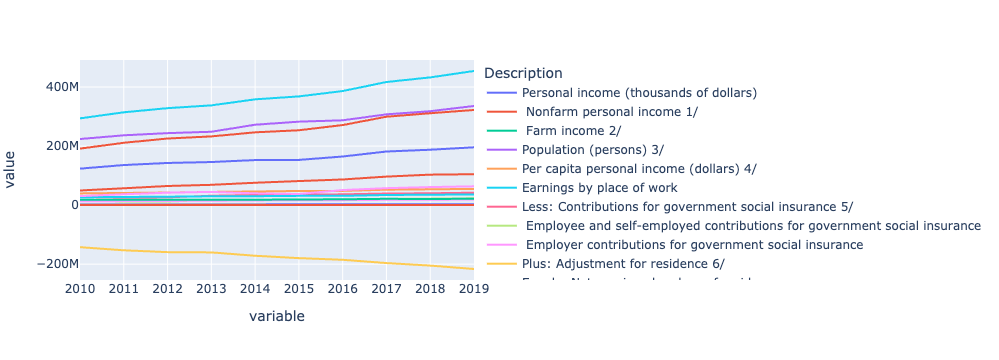

In [409]:
# px.line(nyc, y = 'value', x = 'variable', color = 'Description')

### Turning the timeframe to monthly through linear
Thanks Matt!

In [234]:
melted_full_GDP_df

,county,zip,usps_zip_pref_city,usps_zip_pref_state,GeoName,Description,Unit,year,value
0,02020,99504,ANCHORAGE,AK,"Anchorage Municipality, AK",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2013,20184001
1,02020,99501,ANCHORAGE,AK,"Anchorage Municipality, AK",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2013,20184001
2,02020,99508,ANCHORAGE,AK,"Anchorage Municipality, AK",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2013,20184001
3,02020,99504,ANCHORAGE,AK,"Anchorage Municipality, AK",Chain-type quantity indexes for real GDP,Quantity index,2013,97.321
4,02020,99501,ANCHORAGE,AK,"Anchorage Municipality, AK",Chain-type quantity indexes for real GDP,Quantity index,2013,97.321
...,...,...,...,...,...,...,...,...,...
31054,55101,53403,RACINE,WI,"Racine, WI",Chain-type quantity indexes for real GDP,Quantity index,2019,96.772
31055,55101,53403,RACINE,WI,"Racine, WI",Current-dollar GDP (thousands of current dollars),Thousands of dollars,2019,9128301
31056,55139,54901,OSHKOSH,WI,"Winnebago, WI",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2019,9725443
31057,55139,54901,OSHKOSH,WI,"Winnebago, WI",Chain-type quantity indexes for real GDP,Quantity index,2019,108.390


In [236]:
real_gdp_sorted_DF = GDP_grouped_by_descr_melted.get_group('Real GDP (thousands of chained 2012 dollars)').sort_values(by=['zip', 'year']).reset_index()

In [237]:
real_gdp_sorted_DF['value'] = real_gdp_sorted_DF['value'].map(lambda x: int(x))

In [238]:
real_gdp_sorted_DF.loc[df['month']!=12, real_gdp_sorted_DF.columns[9]]

0        19855339
1        19975633
2        20409003
3        20443970
4        20543862
           ...   
10348     2296611
10349     2282237
10350     2234464
10351     2294459
10352     2412574
Name: value, Length: 9491, dtype: int64

In [239]:
# add 11 copies of every row
df= real_gdp_sorted_DF.loc[real_gdp_sorted_DF.index.repeat(12)].reset_index(drop=True) 

# add month column filled with 0
df['month'] = 0 

# get num unique zip codes
zips= df['zip'].unique() 

# get num unique years
years = df['year'].unique() 

# fill in the month column
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * int(df.shape[0]/12)
# months
df['month'] = months

# # replace all elements in rows with month != 12 with nan, 
# # you will have to adjust the columns that you want to avoid replacing with nan
df.loc[df['month']!=12, df.columns[9]] = np.nan 
for item in zips:
    temp = df.loc[df['zip']==item,:]
    temp['value'] = temp['value'].interpolate(method='linear')

    df.loc[df['zip']==item,:] = temp 

<ipython-input-239-86f2322cd17f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['value'] = temp['value'].interpolate(method='linear')


In [ ]:
df.head(20)

In [ ]:
GDP_grouped_by_descr_melted = melted_full_GDP_df.groupby('Description')

In [130]:
zipcodes

array(['10025', '60657', '10023', ..., '26209', '41101', '89155'],
      dtype=object)

In [131]:
GDP_df

,GeoFIPS,GeoName,Description,Unit,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,01000,Alabama,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,157137932,161258050,165250533,175916841,181871047,185337029,...,183014476,185666914,186553871,188814180,187568050,189428816,191523406,193692995,198053707,200829359
4,01000,Alabama,Chain-type quantity indexes for real GDP,Quantity index,84.232,86.440,88.581,94.298,97.490,99.348,...,98.103,99.525,100.000,101.212,100.544,101.541,102.664,103.827,106.164,107.652
5,01000,Alabama,Current-dollar GDP (thousands of current dollars),Thousands of dollars,123035307,128117443,133969348,146886707,156403303,164347837,...,175470140,181929880,186553871,192166511,195037686,200197466,204454687,210895743,221030697,228142616
6,01001,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,943367,973575,987540,1136277,1140062,1224883,...,1222286,1323275,1487130,1416052,1412808,1529517,1581893,1494278,1537059,1501769
7,01001,"Autauga, AL",Chain-type quantity indexes for real GDP,Quantity index,63.435,65.467,66.406,76.407,76.662,82.366,...,82.191,88.982,100.000,95.220,95.002,102.850,106.372,100.481,103.357,100.984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,56043,"Washakie, WY",Chain-type quantity indexes for real GDP,Quantity index,93.824,91.891,95.501,94.150,89.816,101.618,...,102.214,107.635,100.000,101.457,103.830,106.763,96.694,92.046,95.097,99.574
9500,56043,"Washakie, WY",Current-dollar GDP (thousands of current dollars),Thousands of dollars,251552,250180,270514,278625,277704,324182,...,356519,392370,370923,386281,399818,400260,363856,353309,373261,398925
9501,56045,"Weston, WY",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,273028,264863,275349,280013,306772,352711,...,305253,283634,321172,280574,286341,322302,288843,288400,310389,325913
9502,56045,"Weston, WY",Chain-type quantity indexes for real GDP,Quantity index,85.010,82.468,85.733,87.185,95.517,109.820,...,95.044,88.312,100.000,87.360,89.155,100.352,89.934,89.796,96.643,101.476


In [133]:
full_GDP_df = full_GDP_df.loc[full_GDP_df['zip'].isin(zipcodes)]
full_GDP_df

,county,zip,usps_zip_pref_city,usps_zip_pref_state,GeoName,Description,Unit,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5,01001,36067,PRATTVILLE,AL,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,943367,973575,987540,...,1222286,1323275,1487130,1416052,1412808,1529517,1581893,1494278,1537059,1501769
7,01001,36022,DEATSVILLE,AL,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,943367,973575,987540,...,1222286,1323275,1487130,1416052,1412808,1529517,1581893,1494278,1537059,1501769
13,01001,36066,PRATTVILLE,AL,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,943367,973575,987540,...,1222286,1323275,1487130,1416052,1412808,1529517,1581893,1494278,1537059,1501769
14,01001,36703,SELMA,AL,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,943367,973575,987540,...,1222286,1323275,1487130,1416052,1412808,1529517,1581893,1494278,1537059,1501769
17,01001,36067,PRATTVILLE,AL,"Autauga, AL",Chain-type quantity indexes for real GDP,Quantity index,63.435,65.467,66.406,...,82.191,88.982,100.000,95.220,95.002,102.850,106.372,100.481,103.357,100.984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160259,56043,82401,WORLAND,WY,"Washakie, WY",Chain-type quantity indexes for real GDP,Quantity index,93.824,91.891,95.501,...,102.214,107.635,100.000,101.457,103.830,106.763,96.694,92.046,95.097,99.574
160261,56043,82401,WORLAND,WY,"Washakie, WY",Current-dollar GDP (thousands of current dollars),Thousands of dollars,251552,250180,270514,...,356519,392370,370923,386281,399818,400260,363856,353309,373261,398925
160265,56045,82701,NEWCASTLE,WY,"Weston, WY",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,273028,264863,275349,...,305253,283634,321172,280574,286341,322302,288843,288400,310389,325913
160271,56045,82701,NEWCASTLE,WY,"Weston, WY",Chain-type quantity indexes for real GDP,Quantity index,85.010,82.468,85.733,...,95.044,88.312,100.000,87.360,89.155,100.352,89.934,89.796,96.643,101.476


In [136]:
small_df = full_GDP_df.drop_duplicates(subset=['county'])

In [138]:
melted_small_df = pd.melt(small_df,
                                id_vars=['county', 'zip', 
                                         'usps_zip_pref_city', 
                                         'usps_zip_pref_state', 
                                         'GeoName', 'Description', 
                                         'Unit'],\
        value_vars=['2010', '2011', '2012', 
                    '2013', '2014', '2015', 
                    '2016', '2017', '2018', 
                    '2019'])

In [141]:
melted_small_df['value'] = melted_small_df['value'].map(lambda x: int(x))

In [245]:

# melted_small_df = melted_small_df.rename(columns={'variable': 'year'})
melted_small_df[['zip', 'year', 'value']]

,zip,year,value
0,36067,2010,1222286
1,36535,2010,4897798
2,36027,2010,789111
3,35115,2010,378065
4,35976,2010,819070
...,...,...,...
24895,82941,2019,1662822
24896,82901,2019,3861073
24897,82930,2019,926327
24898,82401,2019,369344


In [151]:
# add 11 copies of every row
df= melted_small_df.loc[melted_small_df.index.repeat(12)].reset_index(drop=True) 

# add month column filled with 0
df['month'] = 0 

# get num unique zip codes
zips= df['zip'].unique() 

# get num unique years
years = df['year'].unique() 

# fill in the month column
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * int(df.shape[0]/12)
# months
df['month'] = months

# # replace all elements in rows with month != 12 with nan, 
# # you will have to adjust the columns that you want to avoid replacing with nan
df.loc[df['month']!=12, df.columns[8]] = np.nan 
for item in zips:
    temp = df.loc[df['zip']==item,:]
    temp['value'] = temp['value'].interpolate(method='linear')

    df.loc[df['zip']==item,:] = temp 

<ipython-input-151-76da3fdb531c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['value'] = temp['value'].interpolate(method='linear')


In [240]:
df

,index,county,zip,usps_zip_pref_city,usps_zip_pref_state,GeoName,Description,Unit,year,value,month
0,1908,25013,01013,CHICOPEE,MA,"Hampden, MA",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2013,NaN,1
1,1908,25013,01013,CHICOPEE,MA,"Hampden, MA",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2013,NaN,2
2,1908,25013,01013,CHICOPEE,MA,"Hampden, MA",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2013,NaN,3
3,1908,25013,01013,CHICOPEE,MA,"Hampden, MA",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2013,NaN,4
4,1908,25013,01013,CHICOPEE,MA,"Hampden, MA",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2013,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
124231,26631,02170,99654,WASILLA,AK,"Matanuska-Susitna Borough, AK",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2019,2.373202e+06,8
124232,26631,02170,99654,WASILLA,AK,"Matanuska-Susitna Borough, AK",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2019,2.383045e+06,9
124233,26631,02170,99654,WASILLA,AK,"Matanuska-Susitna Borough, AK",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2019,2.392888e+06,10
124234,26631,02170,99654,WASILLA,AK,"Matanuska-Susitna Borough, AK",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2019,2.402731e+06,11


In [163]:
final_GDP_by_zip = GDP_df.merge(df, 
                       how= 'right', left_on = 'GeoFIPS', 
                       right_on = 'county')\
.drop(['2001', '2002', '2003', '2004', '2005', 
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
                    '2013', '2014', '2015', 
                    '2016', '2017', '2018', 
                    '2019', 'GeoFIPS', 'GeoName_x', 'Description_x', 'Unit_x'], axis=1)

In [164]:
final_GDP_by_zip

,county,zip,usps_zip_pref_city,usps_zip_pref_state,GeoName_y,Description_y,Unit_y,year,value,month
0,01001,36067,PRATTVILLE,AL,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2010,NaN,1
1,01001,36067,PRATTVILLE,AL,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2010,NaN,1
2,01001,36067,PRATTVILLE,AL,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2010,NaN,1
3,01001,36067,PRATTVILLE,AL,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2010,NaN,2
4,01001,36067,PRATTVILLE,AL,"Autauga, AL",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2010,NaN,2
...,...,...,...,...,...,...,...,...,...,...
896395,56045,82701,NEWCASTLE,WY,"Weston, WY",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2019,310926.583333,11
896396,56045,82701,NEWCASTLE,WY,"Weston, WY",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2019,310926.583333,11
896397,56045,82701,NEWCASTLE,WY,"Weston, WY",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2019,325913.000000,12
896398,56045,82701,NEWCASTLE,WY,"Weston, WY",Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2019,325913.000000,12


In [241]:
df.to_csv('../data/GDP_byZip.csv', index=False)